In [1]:
import pandas as pd
from scrape_mngr import (get_clean_data, 
                         create_folder,
                         save_ad_to_csv)



In [2]:
linkovi = ["https://www.njuskalo.hr/iphone-11?condition%5Bused%5D=1",
        "https://www.njuskalo.hr/iphone-11-pro?condition%5Bused%5D=1",
        "https://www.njuskalo.hr/iphone-11-pro-max?condition%5Bused%5D=1",
        "https://www.njuskalo.hr/iphone-12?condition%5Bused%5D=1",
        "https://www.njuskalo.hr/iphone-12-pro?condition%5Bused%5D=1",
        "https://www.njuskalo.hr/iphone-12-pro-max?condition%5Bused%5D=1",
        "https://www.njuskalo.hr/iphone-13?condition%5Bused%5D=1",
        "https://www.njuskalo.hr/iphone-13-pro?condition%5Bused%5D=1",
        "https://www.njuskalo.hr/iphone-13-pro-max?condition%5Bused%5D=1",
        "https://www.njuskalo.hr/iphone-14-pro-max?condition%5Bused%5D=1",
        "https://www.njuskalo.hr/iphone-14-pro?condition%5Bused%5D=1",
        "https://www.njuskalo.hr/iphone-14?condition%5Bused%5D=1",
]



#oglasi = get_clean_data(link)

In [3]:
path = linkovi[1][24:-22]
path

'iphone-11-pro'

In [1]:
from datetime import datetime
datetime.strftime(datetime.today(), '%d-%m-%Y')

'20-12-2023'

In [ ]:
create_folder()
for link in linkovi:
    print(link)
    oglasi = get_clean_data(link)
    path = link[24:-22]
    save_ad_to_csv(path, oglasi)


In [4]:
df = pd.DataFrame.from_dict(oglasi)

In [4]:
oglasi.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   advertiser          107 non-null    object
 1   ad_title            107 non-null    object
 2   location            107 non-null    object
 3   condition           107 non-null    object
 4   price               107 non-null    int32 
 5   ad_description      107 non-null    object
 6   ad_id               107 non-null    int32 
 7   date_of_publishing  107 non-null    object
 8   number_of_showings  107 non-null    int32 
dtypes: int32(3), object(6)
memory usage: 6.4+ KB


In [19]:
oglasi["price"].replace(to_replace=r'\.?(\,.+)?', value="", regex=True, inplace=True)

In [20]:
int_columns = {"price": int, "ad_id": int, "number_of_showings": int}
oglasi = oglasi.astype(int_columns)

In [6]:
#oglasi["price"][53] = oglasi["price"][53].replace(to_replace=r'\,.+', value="", regex=True)
oglasi["price"].describe()

count    107.000000
mean     606.336449
std      156.521018
min       25.000000
25%      520.000000
50%      589.000000
75%      700.000000
max      880.000000
Name: price, dtype: float64

Vađenje podataka i pretvaranje u korisne podatke

Baterija tamo gdje ima da bude samo broj, gdje nema tu je 0
ROM int broj
Garancija True/False
punjač  True/False

izbacit sve koji su zakljucani na icloud 

In [2]:
import pandas as pd
import os
from pricing.pipeline_builder import info_extractor, load_from_csv, concatinate_dfs

In [2]:
data = pd.DataFrame()
ad_text = pd.Series()

In [4]:
# filenames = [
#     "../data/29-11-2023/iphone-11-29-11-2023.csv",
#     "data/29-11-2023/iphone-11-pro-29-11-2023.csv",
#     "data/29-11-2023/iphone-11-pro-max-29-11-2023.csv",
#     "data/29-11-2023/iphone-12-29-11-2023.csv",
#     "data/29-11-2023/iphone-12-pro-29-11-2023.csv",
#     "data/29-11-2023/iphone-12-pro-max-29-11-2023.csv",
#     "data/29-11-2023/iphone-13-29-11-2023.csv",
#     "data/29-11-2023/iphone-13-pro-29-11-2023.csv",
#     "data/29-11-2023/iphone-13-pro-max-29-11-2023.csv",
#     "data/29-11-2023/iphone-14-pro-max-29-11-2023.csv",
#     "data/29-11-2023/iphone-14-pro-29-11-2023.csv",
#     "data/29-11-2023/iphone-14-29-11-2023.csv",
# ]

path = "c:/Users/kanpe/Documents/Python/oglasi_scraper/pricing-tool/data/13-12-2023"

lista_data = load_from_csv(path)

c:\Users\kanpe\Documents\Python\oglasi_scraper\pricing-tool\data\13-12-2023


In [5]:
data = concatinate_dfs(lista_data)

In [6]:
#bildanje podataka pomocu modula

data = info_extractor(data)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 722 entries, 1 to 1506
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   model     716 non-null    object
 1   rom       722 non-null    int32 
 2   battery   722 non-null    int32 
 3   warranty  722 non-null    int32 
 4   locked    722 non-null    bool  
 5   price     722 non-null    int64 
dtypes: bool(1), int32(3), int64(1), object(1)
memory usage: 26.1+ KB


In [8]:
data = data.dropna()

In [15]:
data["model"].unique()

array(['11', '64', '11pro', '11promax', '12', '12pro', '12promax', '13',
       '13pro', '13promax', '14', '14pro', '14promax'], dtype=object)

In [25]:
modeli = data.groupby(["model"])
dvanejst = modeli.get_group("12")

In [27]:
dvanejst[["model", "battery", "price"]].corr()

,model,battery,price
model,NaN,NaN,NaN
battery,NaN,1.000000,0.142923
price,NaN,0.142923,1.000000


In [14]:
data = data.drop(index=data[data["model"]=="13max"].index, axis=0)

In [24]:
data.describe()

,rom,battery,warranty,price
count,678.000000,678.000000,678.000000,678.000000
mean,153.432153,88.405605,0.116519,560.452802
std,92.525061,7.076232,0.321083,310.283579
min,64.000000,20.000000,0.000000,100.000000
25%,128.000000,85.000000,0.000000,370.000000
50%,128.000000,88.000000,0.000000,530.000000
75%,256.000000,92.000000,0.000000,700.000000
max,512.000000,100.000000,1.000000,6103.000000


In [98]:
data.loc[(data.model=="11") & (data.rom =="128"), ["battery", "warranty"]]

,battery,warranty
3,NaN,False
7,100.0,True
8,87.0,False
11,81.0,False
17,NaN,False
20,78.0,False
23,83.0,False
50,NaN,False
67,NaN,False
68,86.0,False


In [52]:
data["battery"] = data["battery"].astype("float")
median_battery_by_model = data.groupby("model")["battery"].transform("mean")
data["battery"] = data["battery"].fillna(median_battery_by_model)

In [14]:
data.drop(index=data[data["battery"]<50].index, axis=0, inplace=True)

In [120]:
data["battery"].loc[data["model"]=="12promax"].mean()

86.65384615384616

In [30]:
data_nonan = data.dropna()

In [8]:
data_nonan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 678 entries, 1 to 1425
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   model     678 non-null    object
 1   rom       678 non-null    int32 
 2   battery   678 non-null    int32 
 3   warranty  678 non-null    int32 
 4   locked    678 non-null    bool  
 5   price     678 non-null    int64 
dtypes: bool(1), int32(3), int64(1), object(1)
memory usage: 24.5+ KB


In [37]:
data["battery"].plot.hist()

<Axes: ylabel='Frequency'>

In [123]:
import numpy as np

In [136]:
known_values = data["battery"].dropna()
mean_value = known_values.mean()
std_value = known_values.std()

imputed_values = np.random.normal(loc=mean_value, scale=std_value, size=data["battery"].isnull().sum())

data.loc[data["battery"].isna(), "battery"] = imputed_values

In [138]:
mean_value

88.82700421940929

In [139]:
data.loc[data["battery"]>100, "battery"] = mean_value

In [31]:
data.drop(index=data[data["battery"]<50].index, axis=0, inplace=True)

In [32]:
data[["battery", "model"]].groupby("model").boxplot(figsize=(20, 10), subplots=False)

<Axes: >

<Axes: >

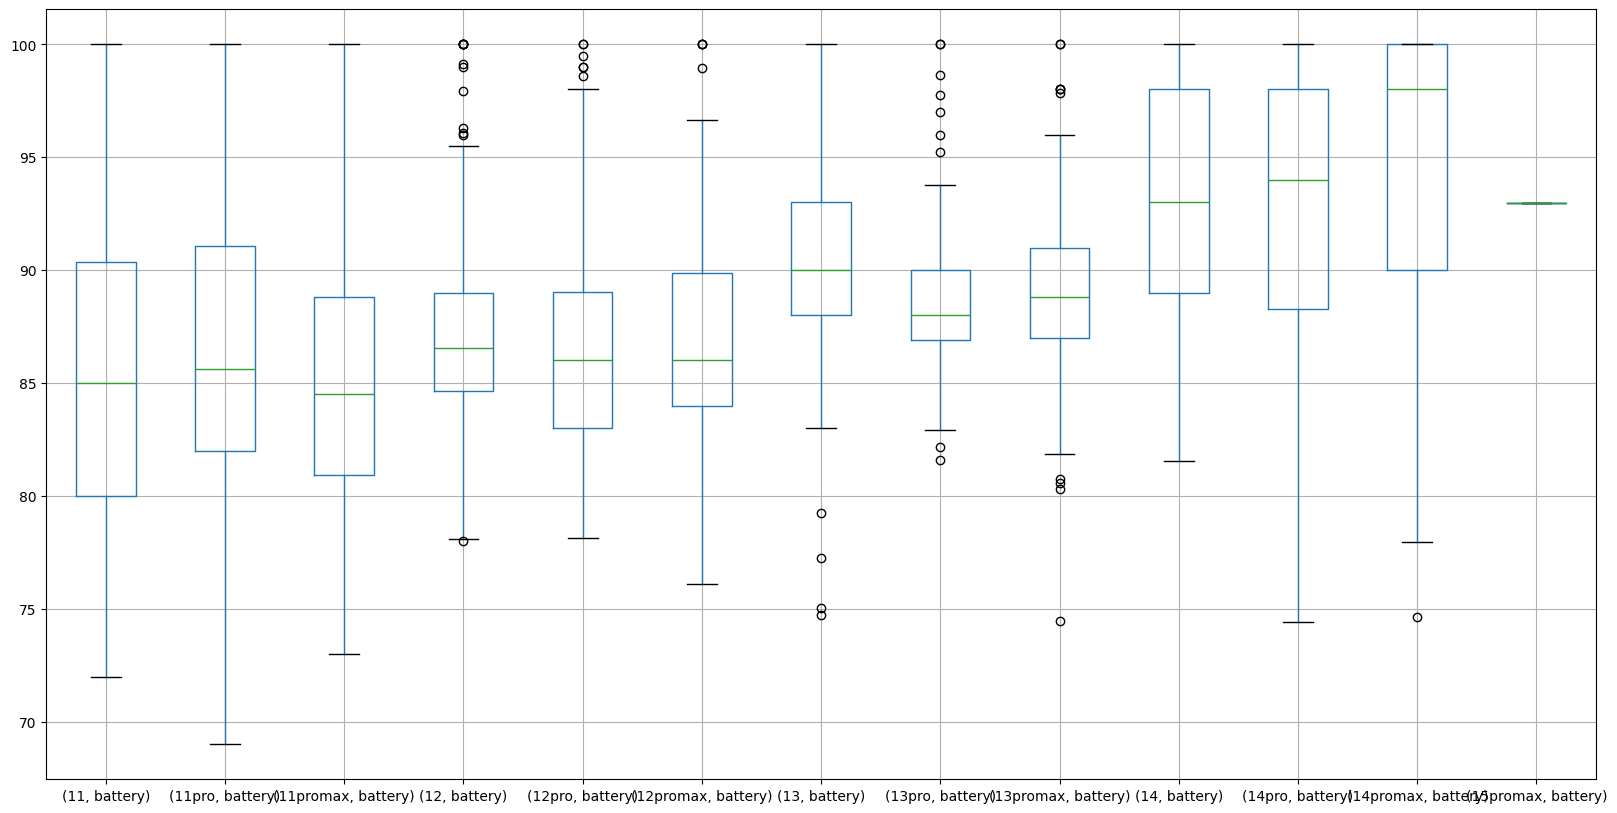

In [171]:
data[["battery", "model"]].groupby("model").boxplot(figsize=(20, 10), subplots=False)

In [142]:
data.isna().sum()

model       3
rom         0
battery     0
warranty    0
locked      0
price       0
dtype: int64

In [28]:
data = data.dropna()
modeli = data.groupby(["model"])
dvanejst = modeli.get_group("12")

In [30]:
dvanejst=dvanejst.astype("int")

In [32]:
dvanejst.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76 entries, 329 to 1292
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   model     76 non-null     int32
 1   rom       76 non-null     int32
 2   battery   76 non-null     int32
 3   warranty  76 non-null     int32
 4   locked    76 non-null     int32
 5   price     76 non-null     int32
dtypes: int32(6)
memory usage: 2.4 KB


In [36]:
data_model = data.groupby(["model"]).mean()

In [37]:
data_model

,rom,battery,warranty,locked,price
model,,,,,
11,76.936170,83.819149,0.021277,0.0,262.053191
11pro,120.320000,85.240000,0.000000,0.0,343.720000
11promax,142.590909,83.272727,0.000000,0.0,336.090909
12,110.769231,86.333333,0.025641,0.0,374.000000
12pro,169.674419,85.918605,0.000000,0.0,473.151163
12promax,193.431373,85.431373,0.039216,0.0,542.666667
13,140.521739,89.576087,0.032609,0.0,523.076087
13pro,180.800000,88.850000,0.012500,0.0,643.912500
13promax,207.058824,89.426471,0.088235,0.0,734.764706


In [6]:
data.drop("locked", axis=1, inplace=True)

In [22]:
data["model"].unique()

array(['11', '11pro', nan, '64', '11promax', '12', '12pro', '12promax',
       '13', '13pro', '13promax', '13max', '14', '14pro', '14promax'],
      dtype=object)

In [29]:
data=data.drop(data[data["model"]=="13max"].index)

In [35]:
data_nonan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 676 entries, 1 to 1425
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   model     676 non-null    object
 1   rom       676 non-null    int32 
 2   battery   676 non-null    int32 
 3   warranty  676 non-null    int32 
 4   locked    676 non-null    bool  
 5   price     676 non-null    int64 
dtypes: bool(1), int32(3), int64(1), object(1)
memory usage: 24.4+ KB


In [38]:
working_data = data_nonan.copy()



In [220]:
working_data["price"] = working_data["price"] *0.95

In [233]:
working_data["price"].plot(kind="hist")

<Axes: ylabel='Frequency'>

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.compose import ColumnTransformer
import pandas as pd

In [9]:
X = data[["model", "rom", "battery", "warranty"]]
y = data["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.42, random_state=0)

preprocessor = ColumnTransformer(
    transformers=[
        ("model", OneHotEncoder(), ["model"]),
        ("rom", OneHotEncoder(), ["rom"])
    ],
    remainder="passthrough"
)

pipe = Pipeline([("preprocessor", preprocessor), 
                 ("polynomial", PolynomialFeatures(degree=3, include_bias=False)), 
                 ("model", LinearRegression())])

pipe.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('model', OneHotEncoder(),
                                                  ['model']),
                                                 ('rom', OneHotEncoder(),
                                                  ['rom'])])),
                ('polynomial',
                 PolynomialFeatures(degree=3, include_bias=False)),
                ('model', LinearRegression())])

In [10]:
score = pipe.score(X_test, y_test)
print(f'R-squared score on the test set: {score}')

ValueError: Found unknown categories ['64'] in column 0 during transform

In [20]:
os.chdir("c:/Users/kanpe/Documents/Python/oglasi_scraper/cell_phone_price/")

In [21]:
import pickle

with open("./pricing/modeldata/reg13-12-100.pkl", "wb") as file:
    pickle.dump(model_reg, file)

prvi je 450
drugi 650
treci je 650
cetvrti je 550

542.19452148, 536.57273296, 730.39148447, 674.63053333
[532.04078469, 528.05917766, 735.69795182, 688.51168927]

In [1]:
import pickle
import os
from sklearn.linear_model import LinearRegression
import pandas as pd

In [2]:
with open('./pricing/modeldata/reg13-12-100.pkl', 'rb') as file:
    loaded_model100b = pickle.load(file)

# with open('./pricing/modeldata/regresija100c.pkl', 'rb') as file:
#     loaded_model100c = pickle.load(file)
# with open('./pricing/modeldata/regresija100.pkl', 'rb') as file:
#     loaded_model100 = pickle.load(file)
with open('./pricing/modeldata/reg29-11-100.pkl', 'rb') as file:
    loaded_model95 = pickle.load(file)

In [6]:
os.getcwd()

'c:\\Users\\kanpe\\Documents\\Python\\oglasi_scraper\\cell_phone_price'

In [3]:
podaci = pd.DataFrame({"battery":[87], 
                       "rom": [64], 
                       "model": ["12"],
                       "warranty": [0]})


predictions = loaded_model100b.predict(podaci)
print(predictions[0], predictions[0]*0.87)
# predictions = loaded_model100c.predict(podaci)
# print(predictions[0], predictions[0]*0.87)
# predictions = loaded_model100.predict(podaci)
# print(predictions[0], predictions[0]*0.87)
predictions = loaded_model95.predict(podaci)
print(predictions[0], predictions[0]*0.87)

364.99080339320665 317.5419989520898
373.2890720366779 324.76149267190976
